<a href="https://colab.research.google.com/github/vishnuhala/machineLearning/blob/main/mllab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
df = pd.read_excel("Lab Session Data.xlsx", sheet_name='Purchase data')

print(df.to_string())
A = df[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
dim=df.to_numpy().shape
print("dimentionality of dataset is:",dim)
print("number of vectors is :",dim[0])
matA = A.values
C= df['Payment (Rs)']
matC=C.values
print("Matrix A:\n", matA)
rank = np.linalg.matrix_rank(matA)
print("rank of matrix A is ", rank)
print("Matrix C:\n", matC)
invA=np.linalg.pinv(matA)
print("Inverse of A:\n", invA)
res = np.dot(invA,matC)
print("Matrix X:\n",res)

df['RICH/POOR'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
print(df.to_string())

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Candy  Mango  Milk
0      C_1           20             6                 2           386         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN    1.0   55.0  18.0
1      C_2           16             3                 6           289         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN    NaN    NaN   NaN
2      C_3           27             6                 2           393         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN     

The mean of price is  1560.663453815261
The variance in price is  58732.365352539186
The mean price on wednesdays is  1550.706
The difference between the mean price usually and mean price wednesday's is  9.957453815261033
The mean price in april is  1698.9526315789474
The difference between the mean price usually and mean price in april is  -138.28917776368644
Probability of making a profit on Wednesday 0.42
The probability of profit given it is wedneday is  0.08433734939759036


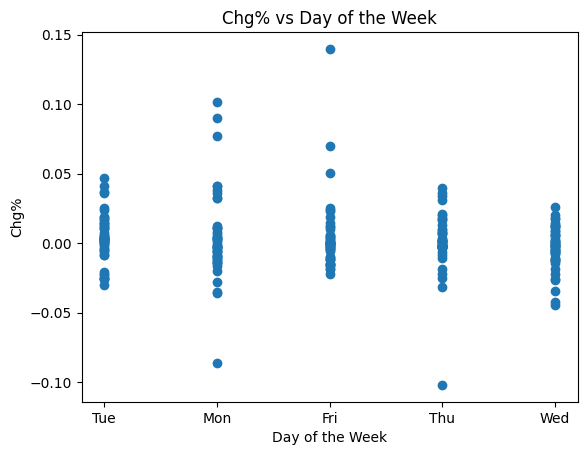

In [16]:

#Q4



import statistics
import pandas as pd
import matplotlib.pyplot as plot

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='IRCTC Stock Price')

pricedata=data['Price']
daily_mean=statistics.mean(pricedata)
print("The mean of price is ",daily_mean)
print("The variance in price is ",statistics.variance(pricedata))

wed_data=data[data['Day']=='Wed']
mean_wed=statistics.mean(wed_data['Price'])
print("The mean price on wednesdays is ",mean_wed)
print("The difference between the mean price usually and mean price wednesday's is ",daily_mean-mean_wed)

apr_data = data[data['Month']=='Apr']
mean_apr=statistics.mean(apr_data['Price'])
print("The mean price in april is ",mean_apr)
print("The difference between the mean price usually and mean price in april is ",daily_mean-mean_apr)

"""chgdata=data['Chg%']
prob_loss = len(chgdata[chgdata < 0]) / len(chgdata)
print("The probability of loss is ",prob_loss)"""

prob_profit_wednesday = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)
print("Probability of making a profit on Wednesday", prob_profit_wednesday)

inv_denom=(len(wed_data) / len(data))
conditional_prob = prob_profit_wednesday *inv_denom
print("The probability of profit given it is wedneday is ",conditional_prob)


plot.scatter(data['Day'], data['Chg%'])
plot.xlabel('Day of the Week')
plot.ylabel('Chg%')
plot.title('Chg% vs Day of the Week')
plot.show()


Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

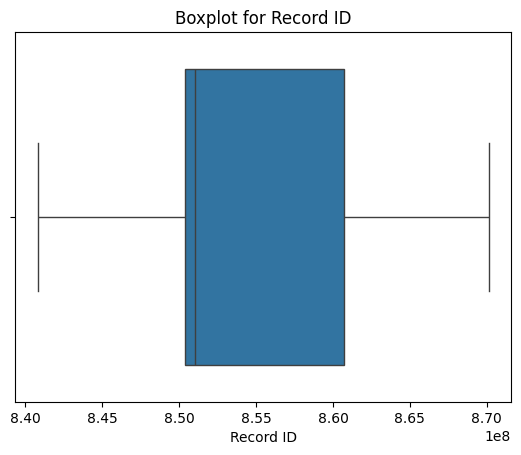

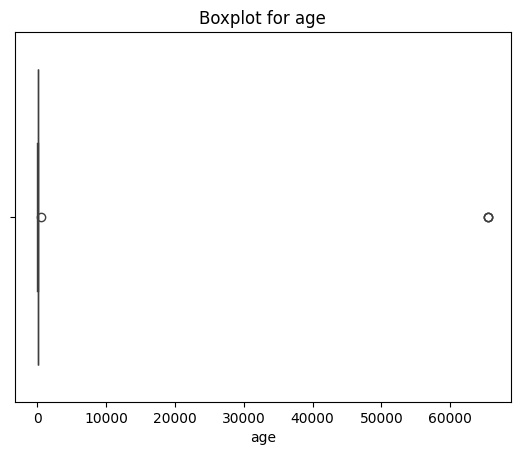

Mean and std. deviation for Record ID is  852947346.6122983  and  7581968.7803465845
Mean and std. deviation for age is  73.55582206716092  and  1183.976718044466


In [20]:
#Q5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
print(data.dtypes)
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64']).columns

for i in cat_cols:
    values=data[i].unique()
    print("Unique values in column",i," ",values)

    if len(values) < 100:
            print(f"Suggested Encoding: Label Encoding")
            data[i] = data[i].astype('category').cat.codes
    else:
        print(f"Suggested Encoding: One-Hot Encoding")
        data = pd.get_dummies(data, columns=[i], prefix=[i])

for i in num_cols:
    print("Data range for numeric attributes such as", i," is ",data[i].min()," to ",data[i].max())

data.replace('?', np.nan, inplace=True)

print("Number of missing values in each feature")
missing_values = data.isnull().sum()
print(missing_values)

print("\nOutliers in Numeric Data:")
for i in num_cols:
    sns.boxplot(x=data[i])
    plt.title("Boxplot for {}".format(i))
    plt.show()


for i in num_cols:
    print("Mean and std. deviation for", i, "is ", data[i].mean()," and ", data[i].std())